<a href="https://colab.research.google.com/github/arpanastanley24/Brain-tumor-classification/blob/main/BrainTumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BRAIN TUMOR**
A cancerous or non-cancerous mass or growth of abnormal cells in the brain.


### **Symptoms:**
*New or increasingly strong headaches

*Blurred vision

*Loss of balance

*confusion

*seizures


### **Treatment:**
Brain tumors are treated with surgery, radiation therapy and chemotherapy.

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing the Dataset
df=pd.read_csv('/content/drive/MyDrive/braintumor.csv')
df

AFFX-BioB-5_at  AFFX-BioB-M_at  AFFX-BioB-3_at  AFFX-BioC-5_at  \
0             -156            -115            -140             149   
1               16             -63             -89              92   
2               34             -81             163             110   
3              -72             -58              60             170   
4             -552            -212            -191             374   
5               33            -110             -31              12   
6              -76             -54              97              -6   
7             -159            -148            -474             595   
8             -106             -14              87             177   
9             -432            -173            -101              65   
10            -133            -119            -162              42   
11             -76            -289             180             -43   
12            -433            -240             534             240   
13             -82            -141             -82             377   
14            -790            -934            -190             451   
15            -367            -291             -83             109   
16             -36            -213            -218             544   
17            -184            -137            -334              52   
18            -200            -352             341             368   
19              -4            -272             714             408   
20            -132            -211            -163             143   
21             -82            -136            -148             121   
22             -82            -181             -51              -8   
23            -208            -115            -223              81   
24            -557            -326            -184             107   
25            -114            -131            -251              67   
26            -124            -131            -134             192   
27            -117             -76            -126             163   
28             -25            -139            -135              -8   
29            -466            -441            -340             215   
30            -212            -200            -279             807   
31           -1969           -1688             490             627   
32            -198            -314            -105             262   
33           -1425           -1074             226             867   
34             -80              -4             291             318   
35             -72             -24            -268             122   
36            -394            -605             827             471   
37               8            -408              51             198   
38             -89             -64              14             163   
39            -106            -359              14             424   

    AFFX-BioC-3_at  AFFX-BioDn-5_at  AFFX-BioDn-3_at  AFFX-CreX-5_at  \
0             -111             -334              -47            -204   
1             -394             -719              290            -132   
2             -230             -353              158            -114   
3             -117             -328              264             -71   
4              -50             -404             -399             -61   
5             -267             -663              239            -238   
6             -100             -541              488             -97   
7             -708             -744              708            -304   
8             -305             -300               21            -106   
9             -286             -505              888            -137   
10            -290            -1150             1199            -166   
11            -732            -1294             1180            -650   
12            -539            -1010             -279            -346   
13            -354             -991            -1234            -797   
14            -498            -1139             1090 

# **BASIC PREPROCESSING**

In [4]:
#Retrieves the first 5 rows
df.head()

AFFX-BioB-5_at  AFFX-BioB-M_at  AFFX-BioB-3_at  AFFX-BioC-5_at  \
0            -156            -115            -140             149   
1              16             -63             -89              92   
2              34             -81             163             110   
3             -72             -58              60             170   
4            -552            -212            -191             374   

   AFFX-BioC-3_at  AFFX-BioDn-5_at  AFFX-BioDn-3_at  AFFX-CreX-5_at  \
0            -111             -334              -47            -204   
1            -394             -719              290            -132   
2            -230             -353              158            -114   
3            -117             -328              264             -71   
4             -50             -404             -399             -61   

   AFFX-CreX-3_at  AFFX-BioB-5_st  ...  U58516_at  U73738_at  X06956_at  \
0            -148             377  ...       1483        -10        182   
1             238             141  ...       2490        -66       -151   
2             -11              66  ...       1742        154        445   
3              -2              55  ...       1042        -23        130   
4            -219              -6  ...         84       -961       -712   

   X16699_at  X83863_at  Z17240_at  L49218_f_at  M71243_f_at  Z78285_f_at  \
0        -16        472          1           27           51          -27   
1       -280       1484        165           56          328          -61   
2        -57        784        379          -58           36          -77   
3        -88        605        319           28          -51          -80   
4       -741        842         91         -627         -563         -751   

             class  
0  medulloblastoma  
1  medulloblastoma  
2  medulloblastoma  
3  medulloblastoma  
4  medulloblastoma  

[5 rows x 7130 columns]

In [5]:
#Retrieves the last 7 rows
df.tail(7)

AFFX-BioB-5_at  AFFX-BioB-M_at  AFFX-BioB-3_at  AFFX-BioC-5_at  \
33           -1425           -1074             226             867   
34             -80              -4             291             318   
35             -72             -24            -268             122   
36            -394            -605             827             471   
37               8            -408              51             198   
38             -89             -64              14             163   
39            -106            -359              14             424   

    AFFX-BioC-3_at  AFFX-BioDn-5_at  AFFX-BioDn-3_at  AFFX-CreX-5_at  \
33            -426            -1343              591            -108   
34            -300             -568              -22            -264   
35            -256             -428              345            -264   
36            -673             -875             1654            -798   
37            -408            -1046            -1016            -681   
38            -143             -391             1010            -326   
39            -548             -937             -932            -334   

    AFFX-CreX-3_at  AFFX-BioB-5_st  ...  U58516_at  U73738_at  X06956_at  \
33             105             121  ...       5468      -1093       2588   
34             300               0  ...       2275        -71        286   
35             349             128  ...       2084         24        355   
36             471            -923  ...       4058        211         28   
37            -212              35  ...       6792        -81        890   
38            -163             336  ...       2571        -59       -128   
39            -151            -263  ...       1791         89        218   

    X16699_at  X83863_at  Z17240_at  L49218_f_at  M71243_f_at  Z78285_f_at  \
33       -640       6276       2509         -574          426         -670   
34       -120        430        313           71          282         -165   
35        -90        521        233          -31           41          -55   
36        134       4058        461           19          884         -375   
37       -223       2141        929          136          569          -89   
38       -252        198         59         -123          -34         -203   
39         59       1076        727           37          -64         -104   

     class  
33  Normal  
34    PNET  
35    PNET  
36    PNET  
37    PNET  
38    PNET  
39    PNET  

[7 rows x 7130 columns]

In [6]:
#Size of the dataset
print("Size of Dataset: {} rows , {} columns".format(df.shape[0],df.shape[1]))

Size of Dataset: 40 rows , 7130 columns


In [7]:
#Checking for the null values
df.isnull().sum()

AFFX-BioB-5_at    0
AFFX-BioB-M_at    0
AFFX-BioB-3_at    0
AFFX-BioC-5_at    0
AFFX-BioC-3_at    0
                 ..
Z17240_at         0
L49218_f_at       0
M71243_f_at       0
Z78285_f_at       0
class             0
Length: 7130, dtype: int64

In [8]:
#Checking for duplicate values
df.duplicated().sum()

0

In [9]:
#Datatypes for all the columns
df.dtypes

AFFX-BioB-5_at     int64
AFFX-BioB-M_at     int64
AFFX-BioB-3_at     int64
AFFX-BioC-5_at     int64
AFFX-BioC-3_at     int64
                   ...  
Z17240_at          int64
L49218_f_at        int64
M71243_f_at        int64
Z78285_f_at        int64
class             object
Length: 7130, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Columns: 7130 entries, AFFX-BioB-5_at to class
dtypes: int64(7129), object(1)
memory usage: 2.2+ MB


In [11]:
#Summary measure
df.describe().T.style.background_gradient(cmap='cividis')

In [12]:
#Count of each values in the variable 'class'
df['class'].value_counts()

medulloblastoma    10
glioma             10
RhabdoidTu         10
PNET                6
Normal              4
Name: class, dtype: int64

### **BRAIN TUMOR CLASSIFICATION**


Medulloblastoma - A cancerous brain tumor that starts in the lower back part of the brain

Glioma - A type of tumour that occurs in the brain and spinal cord.

RhabdoidTu - A type of cancer that usually forms in the kidney or central nervous system (the brain and spinal cord) but can also form in soft tissues in other areas of the body.

Normal - The Particular individual does not have brain tumor.

PNET - Primitive Neuro-Ectodermal Tumor(PNET) is a type of cancerous tumors which appear similar under the microscope to medulloblastoma but occur primarily in the top part of the brain (the cerebrum).

In [13]:
#Choosing the Independent variables
x=df.iloc[:,:-1]
x

AFFX-BioB-5_at  AFFX-BioB-M_at  AFFX-BioB-3_at  AFFX-BioC-5_at  \
0             -156            -115            -140             149   
1               16             -63             -89              92   
2               34             -81             163             110   
3              -72             -58              60             170   
4             -552            -212            -191             374   
5               33            -110             -31              12   
6              -76             -54              97              -6   
7             -159            -148            -474             595   
8             -106             -14              87             177   
9             -432            -173            -101              65   
10            -133            -119            -162              42   
11             -76            -289             180             -43   
12            -433            -240             534             240   
13             -82            -141             -82             377   
14            -790            -934            -190             451   
15            -367            -291             -83             109   
16             -36            -213            -218             544   
17            -184            -137            -334              52   
18            -200            -352             341             368   
19              -4            -272             714             408   
20            -132            -211            -163             143   
21             -82            -136            -148             121   
22             -82            -181             -51              -8   
23            -208            -115            -223              81   
24            -557            -326            -184             107   
25            -114            -131            -251              67   
26            -124            -131            -134             192   
27            -117             -76            -126             163   
28             -25            -139            -135              -8   
29            -466            -441            -340             215   
30            -212            -200            -279             807   
31           -1969           -1688             490             627   
32            -198            -314            -105             262   
33           -1425           -1074             226             867   
34             -80              -4             291             318   
35             -72             -24            -268             122   
36            -394            -605             827             471   
37               8            -408              51             198   
38             -89             -64              14             163   
39            -106            -359              14             424   

    AFFX-BioC-3_at  AFFX-BioDn-5_at  AFFX-BioDn-3_at  AFFX-CreX-5_at  \
0             -111             -334              -47            -204   
1             -394             -719              290            -132   
2             -230             -353              158            -114   
3             -117             -328              264             -71   
4              -50             -404             -399             -61   
5             -267             -663              239            -238   
6             -100             -541              488             -97   
7             -708             -744              708            -304   
8             -305             -300               21            -106   
9             -286             -505              888            -137   
10            -290            -1150             1199            -166   
11            -732            -1294             1180            -650   
12            -539            -1010             -279            -346   
13            -354             -991            -1234            -797   
14            -498            -1139             1090 

In [14]:
#length of the attributes in the independent variable
len(x.columns)

7129

In [15]:
#Choosing the dependent variable
y=df.iloc[:,-1]
print(y)

0     medulloblastoma
1     medulloblastoma
2     medulloblastoma
3     medulloblastoma
4     medulloblastoma
5     medulloblastoma
6     medulloblastoma
7     medulloblastoma
8     medulloblastoma
9     medulloblastoma
10             glioma
11             glioma
12             glioma
13             glioma
14             glioma
15             glioma
16             glioma
17             glioma
18             glioma
19             glioma
20         RhabdoidTu
21         RhabdoidTu
22         RhabdoidTu
23         RhabdoidTu
24         RhabdoidTu
25         RhabdoidTu
26         RhabdoidTu
27         RhabdoidTu
28         RhabdoidTu
29         RhabdoidTu
30             Normal
31             Normal
32             Normal
33             Normal
34               PNET
35               PNET
36               PNET
37               PNET
38               PNET
39               PNET
Name: class, dtype: object


In [16]:
y.describe()

count                  40
unique                  5
top       medulloblastoma
freq                   10
Name: class, dtype: object

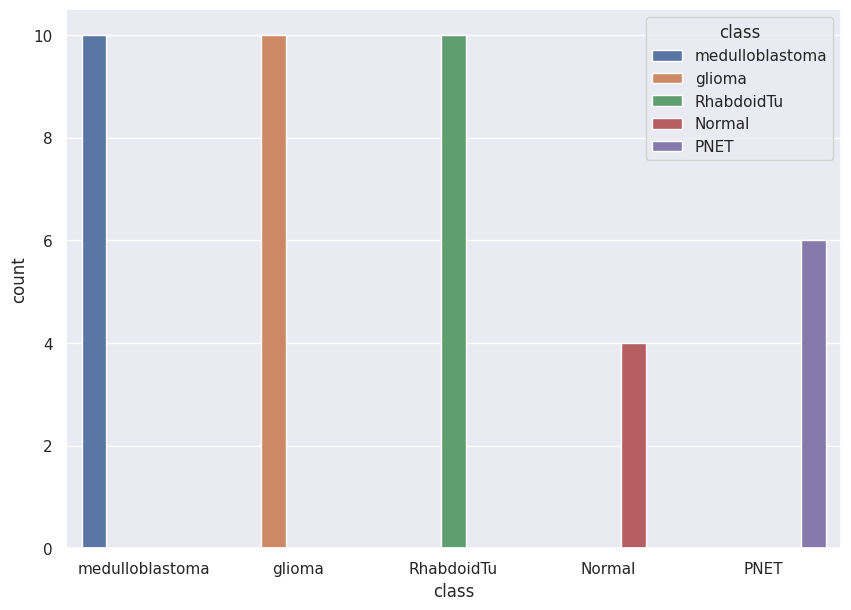

In [17]:
#Pictorial Representation of the three classes present in the dataset
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(x ='class', hue = "class", data = df)
plt.show()

# **ENCODING**

In [18]:
#Encoding the Dependent variable which is Categorical using Label Encoder
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
y=label_encoder.fit_transform(y)
y

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

**Checking the count of the labels "0", "1", "2", "3", "4" present in the dataset.**

0 - Normal

1 - PNET

2 - RhabdoidTu

3 - Glioma

4 - Medullablastoma

In [19]:
#Count of each values in the variable 'class'
print(y[y==0].shape[0], y[y==1].shape[0],y[y==2].shape[0],y[y==3].shape[0],y[y==4].shape[0])

4 6 10 10 10


# **FEATURE SELECTION**

Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

### **CORRELATION**

* Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other.

* Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

In [20]:
selected_features = x.columns

In [21]:
#Importing the pearsonr function from the scipy.stats module
import pandas as pd
from scipy.stats import pearsonr

In [22]:
#Converting x values into int datatype
import pandas as pd
x = x.astype(int)
x.dtypes

AFFX-BioB-5_at    int64
AFFX-BioB-M_at    int64
AFFX-BioB-3_at    int64
AFFX-BioC-5_at    int64
AFFX-BioC-3_at    int64
                  ...  
X83863_at         int64
Z17240_at         int64
L49218_f_at       int64
M71243_f_at       int64
Z78285_f_at       int64
Length: 7129, dtype: object

In [23]:
corr, _ = pearsonr(x[selected_features[2]], y)

In [24]:
# Writing a for loop to find the correlation between 4524 independent variables and
# the dependent variable using pearsonr() function
# the error on this line is an index exception, which can be ignored
new_list=[]
for i in range(0,7129):
    corr, _ = pearsonr(x[selected_features[i]], y)
    print('Pearsons correlation: %.3f' % corr,[selected_features[i]])
    new_list.append(corr)

Streaming output truncated to the last 5000 lines.
Pearsons correlation: 0.144 ['M63483_at']
Pearsons correlation: 0.203 ['M63488_at']
Pearsons correlation: 0.163 ['M63573_at']
Pearsons correlation: 0.151 ['M63582_at']
Pearsons correlation: 0.067 ['M63589_at']
Pearsons correlation: -0.232 ['M63603_at']
Pearsons correlation: 0.003 ['M63623_at']
Pearsons correlation: 0.236 ['M63835_at']
Pearsons correlation: 0.032 ['M63896_at']
Pearsons correlation: -0.031 ['M63904_at']
Pearsons correlation: 0.299 ['M63928_at']
Pearsons correlation: -0.314 ['M63959_at']
Pearsons correlation: -0.053 ['M63962_rna1_at']
Pearsons correlation: -0.205 ['M63967_at']
Pearsons correlation: -0.192 ['M64082_at']
Pearsons correlation: -0.094 ['M64098_at']
Pearsons correlation: 0.160 ['M64099_at']
Pearsons correlation: -0.350 ['M64108_at']
Pearsons correlation: 0.089 ['M64174_at']
Pearsons correlation: -0.225 ['M64347_at']
Pearsons correlation: 0.339 ['M64358_at']
Pearsons correlation: -0.104 ['M64497_at']
Pearsons c

In [25]:
# Pearson correlation matrix
correlation_matrix = df.corr()
correlation_matrix

AFFX-BioB-5_at  AFFX-BioB-M_at  AFFX-BioB-3_at  \
AFFX-BioB-5_at        1.000000        0.906878       -0.245545   
AFFX-BioB-M_at        0.906878        1.000000       -0.362287   
AFFX-BioB-3_at       -0.245545       -0.362287        1.000000   
AFFX-BioC-5_at       -0.532757       -0.571076        0.215119   
AFFX-BioC-3_at        0.378858        0.549256       -0.358738   
...                        ...             ...             ...   
X83863_at            -0.324080       -0.452607        0.590405   
Z17240_at            -0.277331       -0.388050        0.475268   
L49218_f_at           0.526025        0.424675        0.036508   
M71243_f_at           0.092615       -0.001856        0.322405   
Z78285_f_at           0.409668        0.334119       -0.008005   

                AFFX-BioC-5_at  AFFX-BioC-3_at  AFFX-BioDn-5_at  \
AFFX-BioB-5_at       -0.532757        0.378858         0.572471   
AFFX-BioB-M_at       -0.571076        0.549256         0.725724   
AFFX-BioB-3_at        0.215119       -0.358738        -0.459330   
AFFX-BioC-5_at        1.000000       -0.589590        -0.597064   
AFFX-BioC-3_at       -0.589590        1.000000         0.782442   
...                        ...             ...              ...   
X83863_at             0.407188       -0.582039        -0.766826   
Z17240_at             0.371918       -0.409899        -0.745899   
L49218_f_at          -0.126523        0.243625         0.102635   
M71243_f_at           0.183678       -0.082724        -0.273125   
Z78285_f_at          -0.096795        0.252210         0.043624   

                AFFX-BioDn-3_at  AFFX-CreX-5_at  AFFX-CreX-3_at  \
AFFX-BioB-5_at         0.240094        0.233959        0.047515   
AFFX-BioB-M_at         0.230410        0.508479        0.045718   
AFFX-BioB-3_at         0.015811       -0.418981        0.064600   
AFFX-BioC-5_at        -0.029116       -0.342018        0.154985   
AFFX-BioC-3_at         0.076733        0.581754       -0.152705   
...                         ...             ...             ...   
X83863_at              0.166282       -0.551615        0.091616   
Z17240_at             -0.053822       -0.423618        0.056964   
L49218_f_at            0.197654       -0.018016        0.342979   
M71243_f_at            0.226572       -0.242910        0.446355   
Z78285_f_at            0.091227        0.020502        0.244171   

                AFFX-BioB-5_st  ...  U48730_at  U58516_at  U73738_at  \
AFFX-BioB-5_at        0.159316  ...  -0.165987  -0.036590   0.494985   
AFFX-BioB-M_at        0.226382  ...  -0.214167  -0.234878   0.382849   
AFFX-BioB-3_at       -0.492053  ...  -0.197622   0.191384   0.002807   
AFFX-BioC-5_at       -0.045473  ...  -0.002789   0.230351  -0.034150   
AFFX-BioC-3_at        0.278282  ...  -0.232485  -0.314532   0.168066   
...                        ...  ...        ...        ...        ...   
X83863_at            -0.380180  ...   0.152799   0.519348  -0.087635   
Z17240_at            -0.156315  ...   0.234942   0.486740   0.150653   
L49218_f_at           0.095437  ...  -0.082820   0.061080   0.911769   
M71243_f_at          -0.127902  ...  -0.106222   0.291900   0.689547   
Z78285_f_at           0.148386  ...  -0.101312  -0.019617   0.926580   

                X06956_at  X16699_at  X83863_at  Z17240_at  L49218_f_at  \
AFFX-BioB-5_at  -0.470233   0.422849  -0.324080  -0.277331     0.526025   
AFFX-BioB-M_at  -0.503473   0.326552  -0.452607  -0.388050     0.424675   
AFFX-BioB-3_at   0.302636   0.109662   0.590405   0.475268     0.036508   
AFFX-BioC-5_at   0.462502  -0.167788   0.407188   0.371918    -0.126523   
AFFX-BioC-3_at  -0.400386   0.293289  -0.582039  -0.409899     0.243625   
...                   ...        ...        ...        ...          ...   
X83863_at        0.505827   0.001839   1.000000   0.851098     0.017255   
Z17240_at        0.712289   0.259385   0.851098   1.000000     0.274883   
L49218_f_at      0.186299   0.924153   0.017255   0.274883     1.000000  

In [26]:
# Get the absolute correlation values for each gene and sort them in descending order
gene_correlations = abs(correlation_matrix.iloc[-1, :-1]).sort_values(ascending=False)

# Features that have a correlation greater than 0.6
corr_features = gene_correlations[gene_correlations >= 0.6]
print("Selected Features with correlation >= 0.6:")
corr_features.index.tolist()

Selected Features with correlation >= 0.6:


['L49218_f_at',
 'U73738_at',
 'AFFX-HUMISGF3A/M97935_5_at',
 'AFFX-TrpnX-3_at',
 'X16699_at',
 'AFFX-TrpnX-M_at',
 'AFFX-HUMISGF3A/M97935_MA_at',
 'U10473_s_at',
 'Z49208_at',
 'U33317_rna1_at',
 'Z48520_at',
 'D00003_s_at',
 'Z49205_at',
 'X52009_s_at',
 'M81883_at',
 'L03427_at',
 'L32140_at',
 'M21642_at',
 'M15796_at',
 'M31551_s_at',
 'Z80776_at',
 'M62982_at',
 'M15841_at',
 'X66785_at',
 'X95240_s_at',
 'M86873_s_at',
 'L27071_at',
 'M71243_f_at',
 'U60319_at',
 'U33147_at',
 'M60751_at',
 'X00948_at',
 'X97261_at',
 'X00368_xpt2_at',
 'HG4757-HT5207_s_at',
 'M91029_cds2_at',
 'D26561_cds2_at',
 'U64805_s_at',
 'AFFX-DapX-M_at',
 'X15422_at',
 'X93017_at',
 'J05125_at',
 'X70340_at',
 'HG1728-HT1734_at',
 'U65002_at',
 'X68505_s_at',
 'X97303_at',
 'M15780_at',
 'M62994_at',
 'U90905_at',
 'HG1078-HT1078_at',
 'X82835_at',
 'M31516_s_at',
 'HG4557-HT4962_at',
 'U67092_at',
 'M29540_at',
 'U45878_s_at',
 'M32334_at',
 'HG4169-HT4439_s_at',
 'U29607_at',
 'X07696_at',
 'Z22535_at

In [27]:
len(corr_features)

64

In [28]:
for features, correlation in corr_features.iteritems():
    print(f"{features}: {correlation}")

L49218_f_at: 0.9370036558199787
U73738_at: 0.926580376231232
AFFX-HUMISGF3A/M97935_5_at: 0.9228649240822416
AFFX-TrpnX-3_at: 0.9115306738267996
X16699_at: 0.8969622763159072
AFFX-TrpnX-M_at: 0.8859573593252478
AFFX-HUMISGF3A/M97935_MA_at: 0.8607872976060078
U10473_s_at: 0.8052045488078113
Z49208_at: 0.8050586744690152
U33317_rna1_at: 0.8049389824690322
Z48520_at: 0.7995365902833113
D00003_s_at: 0.7947442207849897
Z49205_at: 0.7536541427025101
X52009_s_at: 0.747693491485178
M81883_at: 0.7411835602973829
L03427_at: 0.74061370333248
L32140_at: 0.7389561866297678
M21642_at: 0.7356483051585379
M15796_at: 0.7329786431440457
M31551_s_at: 0.7296037885422759
Z80776_at: 0.7124990381315821
M62982_at: 0.7100999565814016
M15841_at: 0.7090595078535968
X66785_at: 0.7062347828243779
X95240_s_at: 0.705546503633869
M86873_s_at: 0.704162452209558
L27071_at: 0.7003288395784192
M71243_f_at: 0.6961276538729799
U60319_at: 0.6948957036259648
U33147_at: 0.6884262262925018
M60751_at: 0.6825418420385955
X00948_a

### **PRINCIPAL COMPONENT ANALYSIS(PCA)**

* It is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

* Reducing the number of variables of a data set, while preserving as much information as possible.

In [30]:
# Perform PCA on the selected features
from sklearn.decomposition import PCA
selected_data = df[corr_features.index]
pca = PCA()
pca.fit(selected_data)

PCA()

In [31]:
#Get the principal components
principal_components = pca.components_
print("Principal Components:")
print(principal_components)

Principal Components:
[[-0.02078785 -0.03299241 -0.29511073 ... -0.02179317 -0.00647442
  -0.00702055]
 [ 0.03663039  0.04939593  0.30951117 ...  0.02623818  0.03964103
   0.02162709]
 [ 0.01193126  0.01786558 -0.11840694 ... -0.04186929  0.06121327
   0.01722453]
 ...
 [ 0.07059781 -0.00352318 -0.01621409 ...  0.00415004 -0.19069739
  -0.05523864]
 [ 0.1365096   0.00412335 -0.14482664 ...  0.0282426   0.02459655
  -0.02389902]
 [-0.04915787 -0.00356455  0.20192275 ... -0.07795775 -0.01852627
   0.00079448]]


In [32]:
# Transform the data to its lower-dimensional representation
lower_dimensional_data = pca.transform(selected_data)

# Create a DataFrame to hold the lower-dimensional data
column_names = [f"PC{i+1}" for i in range(lower_dimensional_data.shape[1])]
lower_dimensional_df = pd.DataFrame(data=lower_dimensional_data, columns=column_names)

# Print the lower-dimensional data
print("Lower-dimensional data:")
print(lower_dimensional_df)

Lower-dimensional data:
             PC1           PC2          PC3          PC4          PC5  \
0   -8400.015000  -1515.668678  1681.551761   338.442140     4.793902   
1   -2069.243541   3270.669244   -13.945933   390.826865  -433.555667   
2   -5318.381099    921.159147   671.503177  -131.086646   187.918979   
3   -3278.896859   2673.606746   200.856867  -266.706450   -49.703898   
4    -783.717480  -7300.146638 -2706.855570 -1256.972578 -1960.931486   
5   -2141.632844   4067.690359    52.812525 -1064.664405   129.864363   
6   -5574.051144    662.878109   660.517121    46.192919     3.880390   
7   13042.441424  15057.002069 -4347.990214 -1912.297971  -799.059597   
8   -5865.355085    556.510784   639.339765  -286.435345   -64.587084   
9     393.317131  -1677.428990  -756.649880 -1893.115283  -460.329741   
10  -4212.459683   1452.574057   364.560964 -1023.173726  -256.043583   
11  -5968.795212   -515.619365   880.464245   600.081785  -156.129163   
12   4304.813740  -3918.612

In [33]:
# Explained variance ratio of each principal component:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

Explained Variance Ratio:
[7.95284872e-01 1.25345123e-01 3.09870122e-02 1.22516162e-02
 1.05490405e-02 4.95548597e-03 3.90246230e-03 3.45107875e-03
 2.55155094e-03 1.85365481e-03 1.53977840e-03 1.25869793e-03
 8.87213432e-04 7.18442214e-04 6.28187852e-04 5.74948747e-04
 4.65376038e-04 4.44646006e-04 3.49818759e-04 3.27444115e-04
 2.82078939e-04 2.37735034e-04 1.92175142e-04 1.57872175e-04
 1.38253636e-04 1.12993849e-04 9.25259255e-05 8.54367024e-05
 7.65285302e-05 7.39021889e-05 6.20686543e-05 3.95414934e-05
 2.91123020e-05 2.57900276e-05 1.96891204e-05 1.73948194e-05
 1.26613730e-05 1.02526747e-05 7.53704060e-06 7.27172930e-33]


# **TRAIN AND TEST SETS**

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# **NORMALIZATION**

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# **MODEL BUILDING**

### **LOGISTIC REGRESSION**

* Logistic regression is used for solving the classification problems.

* It is used for predicting the categorical dependent variable using a given set of independent variables.

* Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc..

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

#Evaluation of the model
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test, average='macro'))
print("recall score : ",recall_score(y_pred,y_test, average='macro'))
print("f1 score : ",f1_score(y_pred,y_test, average='macro'))

Accuracy score :  0.9
precision score :  0.9333333333333332
recall score :  0.8333333333333334
f1 score :  0.8518518518518517


### **K-NEAREST NEIGHBOR**

* K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

* K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

* It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

#Evaluation of the model
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test, average='macro'))
print("recall score : ",recall_score(y_pred,y_test, average='macro'))
print("f1 score : ",f1_score(y_pred,y_test, average='macro'))

Accuracy score :  0.6
precision score :  0.7333333333333334
recall score :  0.7333333333333334
f1 score :  0.5555555555555557


### **RANDOM FOREST CLASSIFIER**

* Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

* The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

#Evaluation of the model
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test, average='macro'))
print("recall score : ",recall_score(y_pred,y_test, average='macro'))
print("f1 score : ",f1_score(y_pred,y_test, average='macro'))

Accuracy score :  0.7
precision score :  0.6
recall score :  0.5833333333333334
f1 score :  0.5178571428571429


### **DECISION TREE CLASSIFIER**

* It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.

* It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

#Evaluation of the model
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test, average='macro'))
print("recall score : ",recall_score(y_pred,y_test, average='macro'))
print("f1 score : ",f1_score(y_pred,y_test, average='macro'))

Accuracy score :  0.4
precision score :  0.32999999999999996
recall score :  0.45
f1 score :  0.2742857142857143


### **SUPPORT VECTOR CLASSIFIER**

* The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

* SVM chooses the extreme points/vectors that help in creating the hyperplane.
* These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

In [40]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

#Evaluation of the model
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test, average='macro'))
print("recall score : ",recall_score(y_pred,y_test, average='macro'))
print("f1 score : ",f1_score(y_pred,y_test, average='macro'))

Accuracy score :  0.6
precision score :  0.55
recall score :  0.5833333333333334
f1 score :  0.45833333333333337


# **EVALUATION METRICS OF VARIOUS MACHINE LEARNING MODELS**

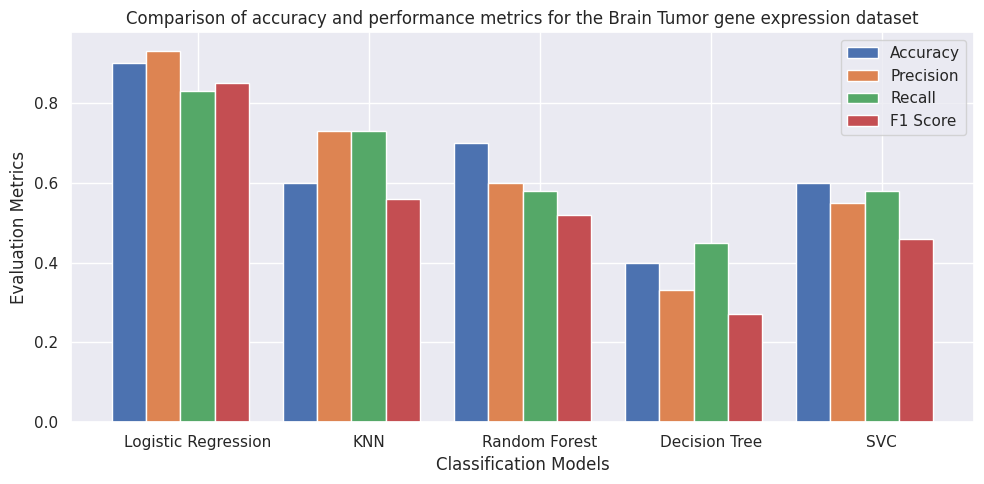

In [47]:
# plot the evaluation metrics for each model
model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC']
accuracy  = [0.9,  0.6,  0.7,  0.4,  0.6]
precision = [0.93, 0.73, 0.6, 0.33, 0.55]
recall    = [0.83, 0.73, 0.58, 0.45, 0.58]
f1_score  = [0.85, 0.56, 0.52, 0.27, 0.46]

num_models = len(model_names)
bar_width = 0.2
bar_positions = np.arange(num_models)
fig, ax = plt.subplots()

# Create the bar plots for each evaluation metric
accuracy_bar = ax.bar(bar_positions, accuracy, bar_width, label='Accuracy')
precision_bar = ax.bar(bar_positions + bar_width, precision, bar_width, label='Precision')
recall_bar = ax.bar(bar_positions + 2 * bar_width, recall, bar_width, label='Recall')
f1_score_bar = ax.bar(bar_positions + 3 * bar_width, f1_score, bar_width, label='F1 Score')

# Set the labels and tick positions in the chart
ax.set_xlabel('Classification Models')
ax.set_xticks(bar_positions + 2 * bar_width)
ax.set_xticklabels(model_names)
fig.set_size_inches(10, 5)
ax.set_ylabel('Evaluation Metrics')
ax.set_title('Comparison of accuracy and performance metrics for the Brain Tumor gene expression dataset')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# **KFOLD CROSS VALIDATION FOR VARIOUS MACHINE LEARNING MODELS**

In [48]:
from sklearn.model_selection import cross_val_score, KFold
cv=KFold(n_splits=5, random_state=0, shuffle=True)

scores = cross_val_score(lr, x_train, y_train, cv = cv,scoring='accuracy')
print("Logistics Regression Average CV Score: ",scores.mean())

scores = cross_val_score(knn, x_train, y_train, cv = cv,scoring='accuracy')
print("KNeighbors Average CV Score: ",scores.mean())

scores = cross_val_score(rfc, x_train, y_train, cv = cv,scoring='accuracy')
print("Random Forest Average CV Score: ",scores.mean())

scores = cross_val_score(dtc, x_train, y_train, cv = cv,scoring='accuracy')
print("Decision Tree Average CV Score: ",scores.mean())

scores = cross_val_score(svc, x_train, y_train, cv = cv,scoring='accuracy')
print("Support Vector Classifier Average CV Score: ",scores.mean())

Logistics Regression Average CV Score:  0.6666666666666666
KNeighbors Average CV Score:  0.4666666666666667
Random Forest Average CV Score:  0.6
Decision Tree Average CV Score:  0.3666666666666666
Support Vector Classifier Average CV Score:  0.4666666666666667


### **PLOT FOR CROSS VALIDATION SCORE ON VARIOUS MACHINE LEARNING MODELS**

[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'KNN'),
 Text(2, 0, 'Random Forest'),
 Text(3, 0, 'Decision Tree'),
 Text(4, 0, 'SVC')]

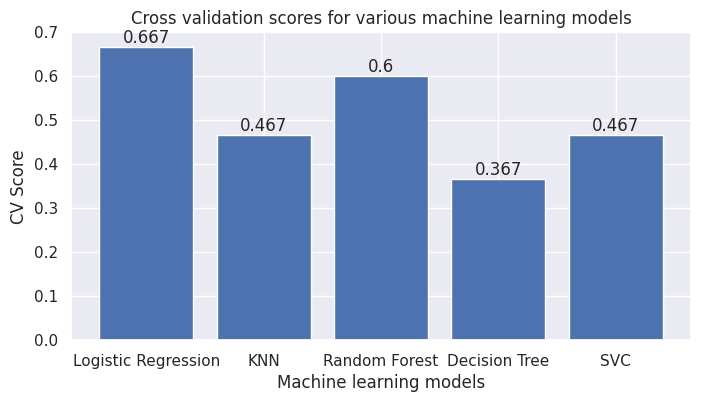

In [50]:
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC']
cv_score = [0.667, 0.467, 0.6, 0.367, 0.467]

position = range(len(models))
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(position, cv_score)

for i, v in enumerate(cv_score):
    ax.text(i, v, str(v), ha='center', va='bottom')

ax.set_xlabel('Machine learning models')
ax.set_ylabel('CV Score')
ax.set_title('Cross validation scores for various machine learning models')
ax.set_xticks(position)
ax.set_xticklabels(models)

### **COMPARISON OF ACCURACY AND AVERAGE OF CROSS VALIDATION SCORES ON VARIOUS MACHINE LEARNING MODELS**

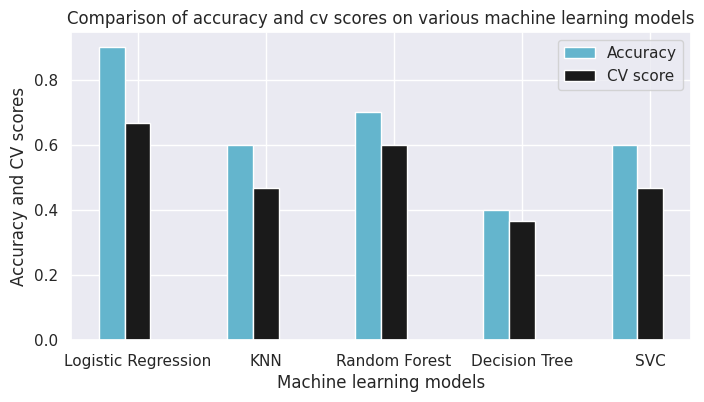

In [52]:
model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC']
accuracy  = [0.9,  0.6,  0.7,  0.4,  0.6]
cv_score = [0.667, 0.467, 0.6, 0.367, 0.467]

position = range(len(models))
plt.figure(figsize=(8, 4))
bar_width = 0.2
plt.bar(position, accuracy, color='c', width=bar_width, label='Accuracy')
plt.bar([p + bar_width for p in position], cv_score, color='k', width=bar_width, label='CV score')
plt.xlabel('Machine learning models')
plt.ylabel('Accuracy and CV scores')
plt.title('Comparison of accuracy and cv scores on various machine learning models')
plt.xticks([p + bar_width for p in position], models)
plt.legend()
plt.show()

### **Logistic regression is the top performer as it has highest accuracy**

# **HYPERPARAMETER TUNING**

In [54]:
#Import GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'max_iter': [50, 100, 200],
    'class_weight': [None, 'balanced', {0: 0.3, 1: 0.7}],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

# Initialize LogisticRegression
lr = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit GridSearchCV to training data
grid_search.fit(x_train, y_train)

# Print best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.4f}")

Best parameters: {'C': 1, 'class_weight': None, 'max_iter': 50, 'multi_class': 'ovr', 'penalty': 'l2'}
Best score: 0.7000


# **FINAL MODEL**

In [55]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1, class_weight=None, max_iter=50, penalty='l2', multi_class='ovr')
lr.fit(x_train,y_train)

LogisticRegression(C=1, max_iter=50, multi_class='ovr')

In [56]:
y_pred_lr = lr.predict(x_test)

### **EVALUATION METRICS**

* The confusion matrix provides insights into the correct and incorrect predictions for each class, allowing for a detailed analysis of accuracy.

* The classification report includes metrics such as F1 score, precision, recall, and accuracy for each class, providing a comprehensive analysis of performance metrics for classification models.

**Accuracy:** Accuracy is an evaluation metric that allows you to measure the total number of predictions a model gets right.

**Precision:** It measures the proportion of correctly predicted positive instances (TP) out of the total instances predicted as positive (TP + FP). It represents the model's ability to minimize false positives.

**Recall (Sensitivity or True Positive Rate):** It measures the proportion of correctly predicted positive instances (TP) out of the total actual positive instances (TP + FN). It represents the model's ability to minimize false negatives.

**F1 Score:** It is the harmonic mean of precision and recall, providing a balanced measure of the model's accuracy. It is particularly useful when dealing with imbalanced datasets.

**Confusion Matrix:**

* The confusion matrix is a table that shows the performance of a classification model by summarizing the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.

* It provides a detailed breakdown of the model's predictions for each class, allowing us to evaluate its performance on different classes separately.

* The rows of the matrix represent the actual classes, while the columns represent the predicted classes.

* The diagonal elements of the matrix represent the correct predictions, while the off-diagonal elements represent the incorrect predictions.

* By analyzing the confusion matrix, we can assess the model's accuracy, precision, recall, and other metrics for each class.

**Classification Report:**

The classification report provides a comprehensive evaluation of a classification model's performance, including metrics such as precision, recall, F1 score, and support.

**Support:** It represents the number of instances in each class, indicating the distribution of the classes in the dataset.

By examining the confusion matrix and classification report, we can gain insights into a model's overall performance, identify potential areas of improvement, and compare the performance of different models based on various metrics.



In [57]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred_lr, y_test)
accuracy

0.9

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("precision score : ",precision_score(y_pred_lr, y_test, average='weighted'))
print("recall score : ",recall_score(y_pred_lr, y_test, average='weighted'))
print("f1 score : ",f1_score(y_pred_lr, y_test, average='weighted'))

precision score :  0.9199999999999999
recall score :  0.9
f1 score :  0.888888888888889


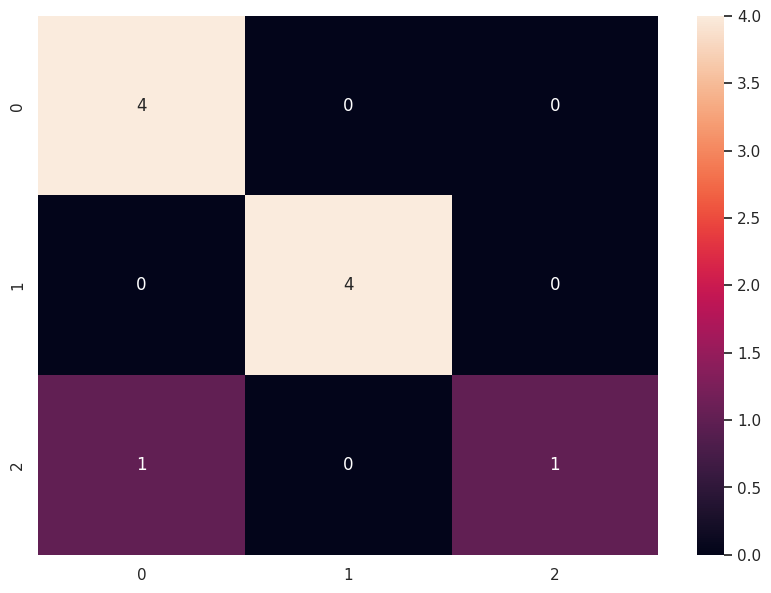

In [59]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_pred,y_test), annot = True)
plt.show()

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_lr, y_test))

              precision    recall  f1-score   support

           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         4
           4       1.00      0.50      0.67         2

    accuracy                           0.90        10
   macro avg       0.93      0.83      0.85        10
weighted avg       0.92      0.90      0.89        10



### **INFERENCE**

* The gene expression dataset for the prediction and classification of brain tumor performs well with an accuracy of 90% in Logistic Regression model.